### Uber Pickups Analysis Quiz

The question set is based on the August dataset, `uber-raw-data-aug14.csv`.

#### Keeping the dataset ready before questions

In [80]:
import pandas as pd

df = pd.read_csv('C:/Users/admin/Downloads/Uber Trips Analysis/Uber Trips Analysis/data/uber-raw-data-aug14.csv')
df.head()

,Date/Time,Lat,Lon,Base
0,8/1/2014 0:03:00,40.7366,-73.9906,B02512
1,8/1/2014 0:09:00,40.7260,-73.9918,B02512
2,8/1/2014 0:12:00,40.7209,-74.0507,B02512
3,8/1/2014 0:12:00,40.7387,-73.9856,B02512
4,8/1/2014 0:12:00,40.7323,-74.0077,B02512


#### Q1. On what date did we see the most number of Uber pickups?

**Skill Test:** Grouping & Counting

In [89]:
# Convert the 'Date/Time' column to datetime format
df['Date/Time'] = pd.to_datetime(df['Date/Time'])

# Group by date and count the number of pickups
df['Date'] = df['Date/Time'].dt.date
pickup_counts_bydate = df.groupby('Date').size().reset_index(name='Number of Pickups')

# Find the date with the highest number of pickups
max_pickups_bydate = pickup_counts_bydate.loc[pickup_counts['Number of Pickups'].idxmax()]

#### Q.2 How many Uber pickups were made on the date with the highest number of pickups?

**Skill Test:** Indexing and filtering

In [92]:
# Filter the DataFrame to include only the rows for the date with the highest number of pickups
max_pickups_bydate = pickup_counts_bydate.nlargest(1, 'Number of Pickups')['Date'].iloc[0]
filtered_df = df[df['Date'] == max_pickups_bydate].reset_index()

# Get the count of pickups on the highest date
pickup_count_on_max_date = len(filtered_df)

#### Q.3 How many unique TLC base companies are affiliated with the Uber pickups in the dataset?

**Skill Test:** Counting unique values

In [93]:
# Count the number of unique TLC base companies

uniques = df['Base'].nunique()

#### Q.4 Which TLC base company had the highest number of pickups?

**Skill Test:** Grouping, counting, and finding the maximum

In [98]:
# Group by TLC base company and count the number of pickups
pickup_counts_bybase = df.groupby('Base').size().reset_index(name='Number of Pickups')

# Find the TLC base company with the highest number of pickups
max_pickups_bybase = pickup_counts_bybase.loc[pickup_counts_bybase['Number of Pickups'].idxmax()]

#### Q.5 How many Uber pickups were made at each unique TLC base company?

**Skill Test:** Grouping and counting

In [99]:
# Group by TLC base company and count the number of pickups
pickup_counts_bybase = df.groupby('Base').size().reset_index(name='Number of Pickups')

#### Q.6 Can you determine the busiest time of day for Uber pickups based on the date/time column?

**Skill Test:** Extracting time components, grouping, counting, and finding the maximum

In [101]:
# Extract the hour from the 'Date/Time' column
df['Hour'] = df['Date/Time'].dt.hour

# Group by hour and count the number of pickups
pickup_counts_byhour = df.groupby('Hour').size().reset_index(name='Number of Pickups')

# Find the hour with the highest number of pickups
max_pickups_byhour = pickup_counts_byhour.loc[pickup_counts_byhour['Number of Pickups'].idxmax()]

#### Q.7 Can you create a visualization (e.g., a bar chart or line plot) to represent the number of Uber pickups over time?

**Skill Test:** Data Visualization using Plotting function 

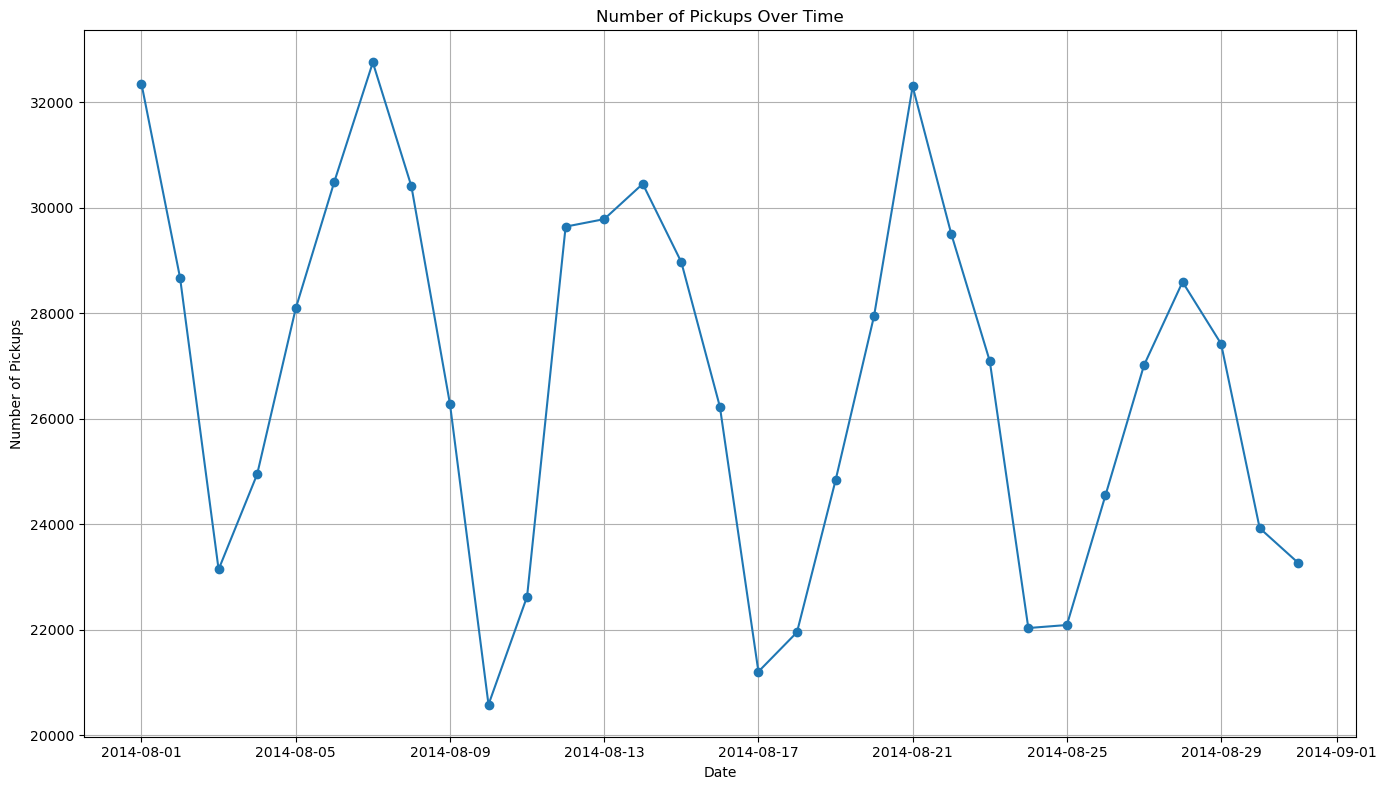

In [103]:
import matplotlib.pyplot as plt

# Group by date and count the number of pickups
pickup_counts_bydate = df.groupby('Date').size().reset_index(name='Number of Pickups')

# Create a line plot to visualize the number of pickups over time
plt.figure(figsize=(14, 8))
plt.plot(pickup_counts_bydate['Date'], pickup_counts_bydate['Number of Pickups'], marker='o', linestyle='-')
plt.title('Number of Pickups Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Pickups')
#plt.xticks(pickup_counts['Date'], rotation=45)
plt.grid(True)
plt.tight_layout()

# Display the plot
plt.show()

#### Q8. Can you create a scatter plot to visualize the distribution of Uber pickups based on latitude and longitude?

**Skill Test:** Scatter Plot

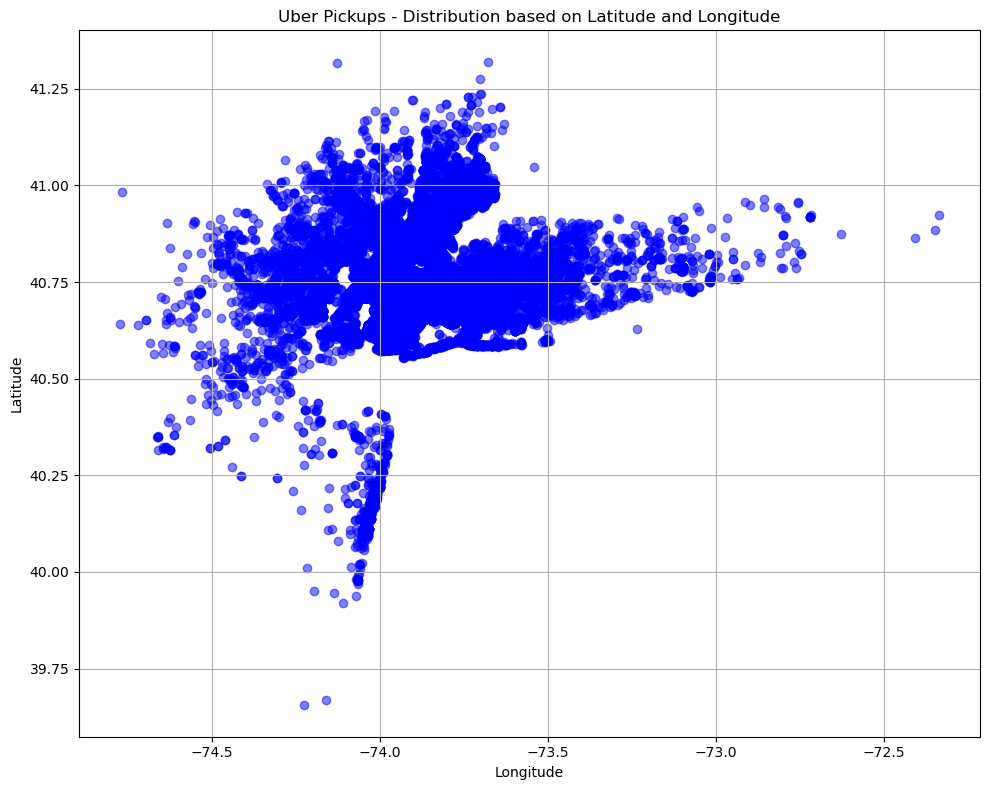

In [65]:
# Create a scatter plot to visualize the distribution of Uber pickups based on latitude and longitude

plt.figure(figsize=(10, 8))
plt.scatter(df['Lon'], df['Lat'], alpha = 0.5, color = 'blue')
plt.title('Uber Pickups - Distribution based on Latitude and Longitude')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True)
plt.tight_layout()

# Display the plot
plt.show()

#### Q9. Can you create a bar chart to compare the number of Uber pickups for each TLC base company?

**Skill Test:** Bar Chart

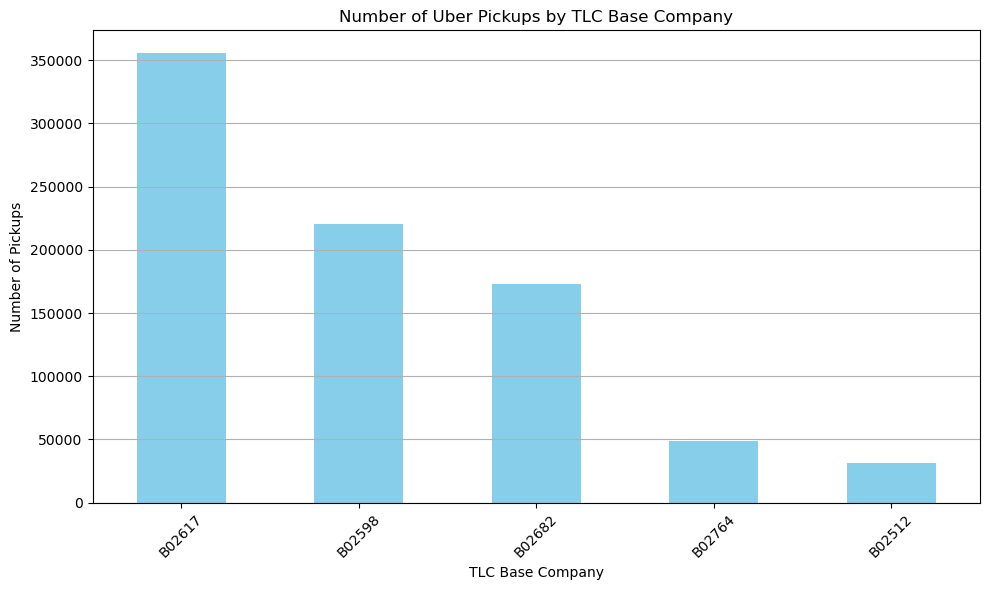

In [67]:
# Create a bar chart to compare the number of Uber pickups for each TLC base company
pickup_counts_by_base = df['Base'].value_counts()

plt.figure(figsize=(10, 6))
pickup_counts_by_base.plot(kind='bar', color='skyblue')
plt.title('Number of Uber Pickups by TLC Base Company')
plt.xlabel('TLC Base Company')
plt.ylabel('Number of Pickups')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()

# Display the plot
plt.show()

#### Q10. Can you create a pie chart to display the percentage distribution of Uber pickups for each day of the week?

**Skill Test:** Pie Chart

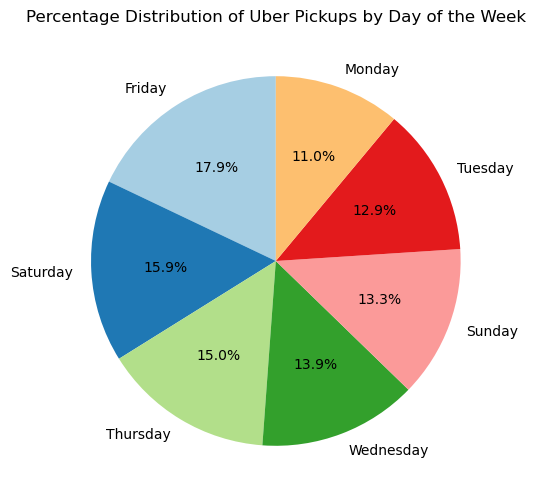

In [78]:
# Group by day of the week and count the number of pickups
df['Date/Time'] = pd.to_datetime(df['Date/Time'])
df['Day_of_Week'] = df['Date/Time'].dt.dayofweek
pickup_counts_by_day = df['Day_of_Week'].value_counts()

# Create a pie chart to display the percentage distribution of Uber pickups for each day of the week
plt.figure(figsize=(8, 6))
percentages.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
plt.title('Percentage Distribution of Uber Pickups by Day of the Week')
plt.ylabel('')

# Display the plot
plt.show()